In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/zlatan599/garbage-dataset-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahaninduwara112
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/zlatan599/garbage-dataset-classification


100%|██████████| 121M/121M [00:00<00:00, 1.55GB/s]

# COMPLETE FIXED PIPELINE

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os


# 1. LOAD DATA

In [ ]:
# Data directory
data_dir = "/content/garbage-dataset-classification/Garbage_Dataset_Classification/images"

# Create datasets with proper class structure
training_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'  # Important for multi-class
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

Found 13901 files belonging to 6 classes.
Using 11121 files for training.
Found 13901 files belonging to 6 classes.
Using 2780 files for validation.


In [ ]:
# Get class names
class_names = training_set.class_names
num_classes = len(class_names)
print(f"Classes found: {class_names}")
print(f"Number of classes: {num_classes}")


Classes found: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Number of classes: 6


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Rescaling
training_set = training_set.map(lambda x, y: (Rescaling(1./255)(x), y))
validation_set = validation_set.map(lambda x, y: (Rescaling(1./255)(x), y))

In [ ]:
callbacks = [
    # Stop training when validation loss doesn't improve for 3 epochs
    EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )]

# 6. TRAIN MODEL

In [ ]:
from tensorflow.keras.optimizers import AdamW

# Initialize AdamW optimizer
optimizer = AdamW(
    learning_rate=1e-3,   # you can tune this
    weight_decay=1e-5     # typical small value for weight decay
)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base.trainable = False

x = GlobalAveragePooling2D() (base.output)
x = Dropout (0.3)(x)
output = Dense (num_classes, activation='softmax')(x)
model = Model (inputs=base.input, outputs=output)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(training_set, validation_data=validation_set,callbacks=callbacks, epochs=15)

Epoch 1/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - accuracy: 0.5731 - loss: 1.1277 - val_accuracy: 0.8255 - val_loss: 0.4978
Epoch 2/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.8214 - loss: 0.5129 - val_accuracy: 0.8471 - val_loss: 0.4363
Epoch 3/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.8398 - loss: 0.4493 - val_accuracy: 0.8565 - val_loss: 0.4104
Epoch 4/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.8541 - loss: 0.4101 - val_accuracy: 0.8565 - val_loss: 0.3953
Epoch 5/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.8634 - loss: 0.3813 - val_accuracy: 0.8601 - val_loss: 0.3940
Epoch 6/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.8710 - loss: 0.3745 - val_accuracy: 0.8673 - val_loss: 0.3850
Epoch 7/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.8674 - loss: 0.3803 - val_accuracy: 0.8665 - val_loss: 0.3764
Epoch 8/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8717 - loss: 0.3487 - 

In [ ]:
model.save("/content/drive/MyDrive/models/modelgarbage1.keras")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/models/modelgarbage1.keras")

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/garbage-dataset-classification/Garbage_Dataset_Classification/images/paper/paper_00005.jpg'

img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)


img_array = np.expand_dims(img_array, axis=0)

preprocessed_image = img_array / 255.0

In [ ]:
prediction = model.predict(preprocessed_image)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


(array([[3.3898726e-02, 4.4250151e-05, 1.5023787e-03, 9.3580961e-01,
         2.8432081e-02, 3.1296723e-04]], dtype=float32),
 (1, 6))

In [ ]:
result_index = np.argmax(prediction)
result_index

np.int64(3)

In [ ]:
class_names[result_index]

'paper'

In [ ]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,281,044 (8.70 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 15,374 (60.06 KB)

In [ ]:
train_loss,train_acc = model.evaluate(training_set)

348/348 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.9253 - loss: 0.2364


In [ ]:
val_loss,val_acc = model.evaluate(validation_set)

87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.8696 - loss: 0.3623


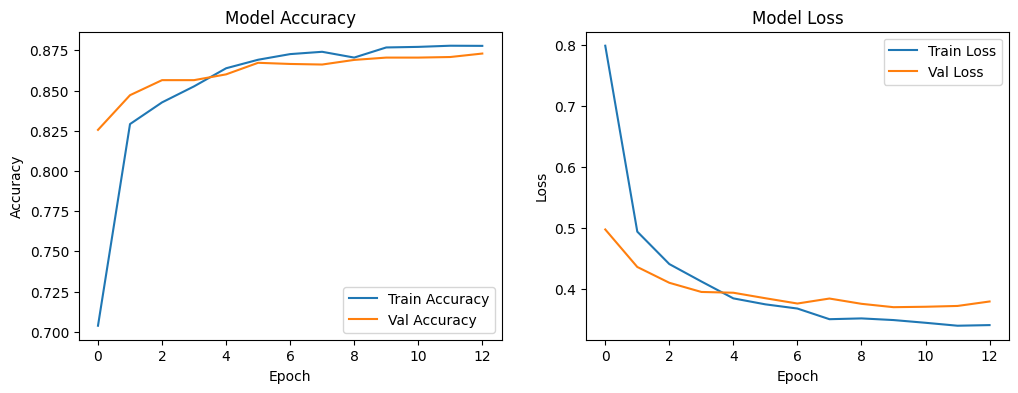

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/images/performance_curves.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


Training Accuracy: 0.9279
Validation Accuracy: 0.8705
Training Loss: 0.2301
Validation Loss: 0.3703


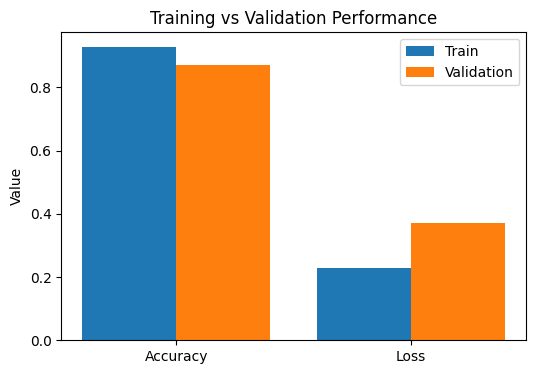

In [ ]:
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Loss']
train_metrics = [train_acc, train_loss]
val_metrics = [val_acc, val_loss]

x = range(len(labels))
plt.figure(figsize=(6,4))
plt.bar(x, train_metrics, width=0.4, label='Train', align='center')
plt.bar([i+0.4 for i in x], val_metrics, width=0.4, label='Validation', align='center')

plt.xticks([i+0.2 for i in x], labels)
plt.title('Training vs Validation Performance')
plt.ylabel('Value')
plt.legend()
plt.savefig("/content/drive/MyDrive/images/train_vs_val_performance.png", dpi=300, bbox_inches='tight')
plt.show()